# Class + related functions to work with a single Micrometeoroid Impact.

Written by Sophie Hourihane - based on work by Ira Thorpe and Nicole Pagane


8/1/2018

### Class functions that might be useful
The impact class has basically everything necessary for working with impacts, but a lot of complicated functions are behind the scenes 

#### Coordinate Conversions
All coordinates are definined in the initialization of the class (which makes them large objects) but here they are for reference anyways
##### SCtoECI
- Transforms from spacecraft frame to **E**arth **C**entered **I**ntertial
    - specifically J2000

##### ECI_to_SUN
- Transforms from spacecraft frame to Sun Centered Ecliptic frame HEE
    - direction of earth around sun = (-90, 0) (prograde)
    - Sun is (0,0)
    - Direction of retrograde orbit (90, 0)
    

In [1]:
# import relevant libraries
import numpy as np, quaternion
import os
import pathlib
import healpy as hp
import pickle
import matplotlib.pyplot as plt
import datetime
from impactClass import impactClass
from impactClass import impactClassList
import copy
%matplotlib inline

#### Initialize individual impact
Assuming your directory structure is correct & you have the pickle files, everything should work out nicely

In [12]:
# pick a segment time and load the data 
#segment = 1154023383
segment = 1149474616

# setup directory structure
p = pathlib.PurePath(os.getcwd())
BASE_DIR = str(p.parent)
dataDir = '/data'
directory = dataDir + '/ONLY_IMPACTS'

# load GRS1
chainFile = BASE_DIR + directory + '/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid, encoding = 'latin1')
impact1 = impactClass(chainFile, dataDir = dataDir, BASE_DIR = BASE_DIR)
fid.close()

# load GRS2
chainFile = BASE_DIR + directory + '/' + str(segment) +'_grs2.pickle'
if os.path.exists(chainFile) :
    fid = open(chainFile,'rb')
    data2 = pickle.load(fid)
    impact2 = impactClass(chainFile, dataDir = dataDir, BASE_DIR = BASE_DIR)

    fid.close()

# make plot directory
plotDir = BASE_DIR + '/plots/' + str(segment)
if not os.path.exists(plotDir):
    os.makedirs(plotDir)
    
print(impact1.isImpact)
print(impact1.isGlitch)


True
False


In [13]:
print(np.median(impact1.snr))
print(np.median(impact2.snr))

1.530205
1.39146


In [14]:
# check rotation from ECI to MM
d = datetime.datetime.fromtimestamp(impact1.gps + 315964783)
print(d)
q1 = impact1.getSCquats()
q2 = impact1.ECI_to_MM()
q = q1*q2
print(q1)
print(q2)
print(q)
n = np.zeros([3,4])
n[0,1]=1;
n[1,2]=1;
n[2,3]=1;
qu = quaternion.as_quat_array(n)
print(qu)
qrot = q*qu*quaternion.np.conjugate(q)
print(qrot)

2016-06-08 22:52:50.660000
quaternion(0.44445933, -0.18490154, 0.52176772, 0.70429097)
quaternion(0.75415627498298, 0.156864730788391, -0.052708180400786, 0.624322312668991)
quaternion(-0.0480068170805299, 0.293148461629653, 0.595984328049713, 0.736530202027091)
[quaternion(0, 1, 0, 0) quaternion(0, 0, 1, 0) quaternion(0, 0, 0, 1)]
[quaternion(0, -0.809433382736899, 0.278706836480311, 0.489048012575129)
 quaternion(0, 0.420140719212312, -0.270910785286828, 0.849774665937083)
 quaternion(-6.93889390390723e-18, 0.374602770096948, 0.906067164236657, 0.10364805314757)]


In [9]:
q = impact1.getSCquats()
print(q)

quaternion(0.61387722, -0.08316788, -0.58284019, -0.52586612)


### Impact Plots
Most of these were written sometime in the summer of 2017, edited in 2018

In [ ]:
# Make a Flattened version of the LPF
fig = impact1.makeFlatLPF( N = 50, scale = 'log', cmap = plt.cm.Reds)
fig.savefig(plotDir + '/flat_LPF_log_GRS1.eps', format = 'eps')

##### 3D LPF
The functions commented out work correctly, they are just slow and I wanted to show off other functions

In [ ]:
# 3D LPF Working Correctly

# Creates a single 3D image
impact1.make3DLPF()

# Creates Directory for future gifs
#impact1.fillGifDir(BASE_DIR + '/plots/' + str(segment))

# Creates gif using above directory
#impact1.gif_maker(BASE_DIR + '/plots/' + str(segment))

In [ ]:
# Dual Corner Working Correctly
fig = impact1.dualCorner(impact2)
fig.savefig(plotDir + '/dualCorner.eps', format = 'eps')

# This was the command in Microtools
#hf = microTools.dualCorner(data1,data2)
#hf.savefig(plotDir+'/dualCorner.png',format='png')

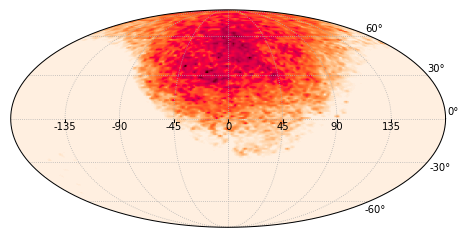

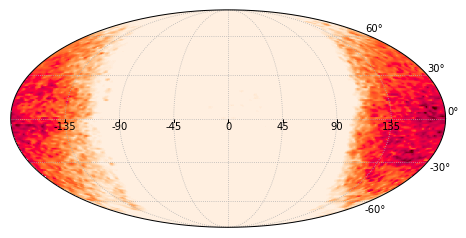

In [15]:
# make the skymaps in the two frames
# Mollewide Working Correctly

# Sun coordinates
fig = impact1.makeMollweide(frame = 'sun')
fig.savefig(plotDir + '/sky_sun1.eps', format = 'eps')
# Spacecraft coordinates
fig = impact1.makeMollweide(frame = 'sc')
fig.savefig(plotDir + '/sky_sc1.png', format = 'png')


In [16]:
print(impact1.lat_c_sun)
print(impact1.lon_c_sun)

40.2281847281
19.6875


### Loading Population model data
Populations models made by Petr
- `modelDir`: full path to population models
- `pop_type`: string, one of ['JFC', 'HTC', 'AST', 'OCC', 'Uniform']
- `usePtot`: Bool, whether to interpolate with momentum as well, should always be True

In [ ]:
from populationClass import population as pop
modelDir = BASE_DIR + dataDir + '/models'
usePtot = True  # Old boolean for ignoring momentum
pop_names = ['JFC', 'HTC', 'AST', 'OCC', 'Uniform']
populations = []
# Takes about 30 seconds to read all populations in 
for p in pop_names:
    print(p)
    populations.append(pop(modelDir = modelDir, pop_type = p, usePtot = True))

In [ ]:
impact1 = impact1.SCtoSun()
impact1.plot_populations(populations, norm = True, scale = 'lin', show_impact = False)

In [ ]:
print(impact1.segment)

In [ ]:
# Log likelihood chain to see mixing
fig, ax = plt.subplots(figsize = (10,10))
ax.set_ylabel("Log Likelihood")
ax.plot(impact1.logL)